## Analysis of apparent temperature data from 1992 to 2024
This notebook presents the process of analyzing apparent temperature from 1992 to 2024. The analysis focuses on the spatial-temporal characteristics of the data.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
import seaborn as sns
import geopandas as gpd

In [18]:
df_CaMau = pd.read_csv('./Data_AT_FilteredDate/CaMau_FilteredDate.csv')
df_LangSon = pd.read_csv('./Data_AT_FilteredDate/LangSon_FilteredDate.csv')
df_LaoCai = pd.read_csv('./Data_AT_FilteredDate/LaoCai_FilteredDate.csv')
df_NoiBai = pd.read_csv('./Data_AT_FilteredDate/NoiBai_FilteredDate.csv')
df_PhuBai = pd.read_csv('./Data_AT_FilteredDate/PhuBai_FilteredDate.csv')
df_QuyNhon = pd.read_csv('./Data_AT_FilteredDate/QuyNhon_FilteredDate.csv')
df_TPHCM = pd.read_csv('./Data_AT_FilteredDate/Vinh_FilteredDate.csv')
df_Vinh = pd.read_csv('./Data_AT_FilteredDate/Vinh_FilteredDate.csv')

station_dfs = {
    'Noi_Bai': df_NoiBai,
    'Lang_Son': df_LangSon,
    'Lao_Cai': df_LaoCai,

    'Vinh': df_Vinh,
    'Phu_Bai': df_PhuBai,
    'Quy_Nhon': df_QuyNhon,

    'TPHCM': df_TPHCM,
    'Ca_Mau': df_CaMau
}

feature_name = {
        'DEW_2': 'Dew point',
        'TMP_2': 'Air temperature',
        'RH': 'Relative humidity',
        'AT mean': 'Mean apparent temperature',
        'AT max': 'Max apparent temperature'
    }

region_dict = {
        # Tây Bắc
        'Sơn La': 'Tây Bắc', 'Điện Biên': 'Tây Bắc', 'Lai Châu': 'Tây Bắc',
        'Lào Cai': 'Tây Bắc', 'Yên Bái': 'Tây Bắc', 'Hoà Bình': 'Tây Bắc',

        # Đông Bắc
        'Lạng Sơn': 'Đông Bắc', 'Cao Bằng': 'Đông Bắc', 'Bắc Kạn': 'Đông Bắc',
        'Thái Nguyên': 'Đông Bắc', 'Quảng Ninh': 'Đông Bắc', 'Bắc Giang': 'Đông Bắc',
        'Phú Thọ': 'Đông Bắc', 'Tuyên Quang': 'Đông Bắc', 'Hà Giang': 'Đông Bắc',

        # Đồng bằng sông Hồng
        'Hà Nội': 'Đồng bằng sông Hồng', 'Hải Phòng': 'Đồng bằng sông Hồng',
        'Hải Dương': 'Đồng bằng sông Hồng', 'Hưng Yên': 'Đồng bằng sông Hồng',
        'Thái Bình': 'Đồng bằng sông Hồng', 'Hà Nam': 'Đồng bằng sông Hồng',
        'Nam Định': 'Đồng bằng sông Hồng', 'Ninh Bình': 'Đồng bằng sông Hồng',
        'Vĩnh Phúc': 'Đồng bằng sông Hồng', 'Bắc Ninh': 'Đồng bằng sông Hồng',

        # Bắc Trung Bộ
        'Thanh Hóa': 'Bắc Trung Bộ', 'Nghệ An': 'Bắc Trung Bộ',
        'Hà Tĩnh': 'Bắc Trung Bộ', 'Quảng Bình': 'Bắc Trung Bộ',
        'Quảng Trị': 'Bắc Trung Bộ', 'Thừa Thiên Huế': 'Bắc Trung Bộ',

        # Duyên hải Nam Trung Bộ
        'Đà Nẵng': 'Duyên hải Nam Trung Bộ', 'Quảng Nam': 'Duyên hải Nam Trung Bộ',
        'Quảng Ngãi': 'Duyên hải Nam Trung Bộ', 'Bình Định': 'Duyên hải Nam Trung Bộ',
        'Phú Yên': 'Duyên hải Nam Trung Bộ', 'Khánh Hòa': 'Duyên hải Nam Trung Bộ',
        'Ninh Thuận': 'Duyên hải Nam Trung Bộ', 'Bình Thuận': 'Duyên hải Nam Trung Bộ',

        # Tây Nguyên
        'Kon Tum': 'Tây Nguyên', 'Gia Lai': 'Tây Nguyên',
        'Đắk Lắk': 'Tây Nguyên', 'Đắk Nông': 'Tây Nguyên',
        'Lâm Đồng': 'Tây Nguyên',

        # Đông Nam Bộ
        'Bình Phước': 'Đông Nam Bộ', 'Tây Ninh': 'Đông Nam Bộ',
        'Bình Dương': 'Đông Nam Bộ', 'Đồng Nai': 'Đông Nam Bộ',
        'Bà Rịa - Vũng Tàu': 'Đông Nam Bộ', 'Hồ Chí Minh': 'Đông Nam Bộ',

        # Đồng bằng sông Cửu Long
        'Long An': 'Đồng bằng sông Cửu Long', 'Tiền Giang': 'Đồng bằng sông Cửu Long',
        'Bến Tre': 'Đồng bằng sông Cửu Long', 'Trà Vinh': 'Đồng bằng sông Cửu Long',
        'Vĩnh Long': 'Đồng bằng sông Cửu Long', 'Đồng Tháp': 'Đồng bằng sông Cửu Long',
        'An Giang': 'Đồng bằng sông Cửu Long', 'Kiên Giang': 'Đồng bằng sông Cửu Long',
        'Cần Thơ': 'Đồng bằng sông Cửu Long', 'Hậu Giang': 'Đồng bằng sông Cửu Long',
        'Sóc Trăng': 'Đồng bằng sông Cửu Long', 'Bạc Liêu': 'Đồng bằng sông Cửu Long',
        'Cà Mau': 'Đồng bằng sông Cửu Long'
    }

### Analyzing the spatio trend of apparent temperature at meteorological stations
Two main aspects are analyzed in this section:
1. **Analysis of feature correlations among meteorological stations**
   * The Pearson correlation method is used to represent the feature correlations among meteorological stations: function plot_corr

   
2. **Analysis of the effect of latitude on meteorological stations**
    * Calculating the 32-year averages of meteorological features at weather stations: function plot_latitude_effect
   

In [19]:
def get_station_info(station_df):
    station_info = dict()
    for station, df in station_df.items():
        first_row = df.iloc[0]
        temp_dict = [first_row['LATITUDE'], first_row['LONGITUDE']]
        station_info[station] = temp_dict

    return station_info


def get_corr(station_df, feature):
    data = {
        'Noi_Bai': list(station_df['Noi_Bai'][feature]),
        'Lang_Son': list(station_df['Lang_Son'][feature]),
        'Lao_Cai': list(station_df['Lao_Cai'][feature]),
        'Vinh': list(station_df['Vinh'][feature]),
        'Phu_Bai': list(station_df['Phu_Bai'][feature]),
        'Quy_Nhon': list(station_df['Quy_Nhon'][feature]),
        'TPHCM': list(station_df['TPHCM'][feature]),
        'Ca_Mau': list(station_df['Ca_Mau'][feature]),
    }
    data = pd.DataFrame(data)
    corr = data.corr(method='pearson')

    return round(corr, 2)

def get_difference(station_df, feature_1, feature_2):
    result_dict = dict()
    for station, df in station_df.items():
        result_dict[station] = df[feature_1] - df[feature_2]
    print(result_dict)

def get_mean(station_df, feature):
    mean_feature_dict = dict()
    for station, df in station_df.items():
        mean_feature = df[feature].mean()
        mean_feature_dict[station] = mean_feature

    print(mean_feature_dict)
    return mean_feature_dict

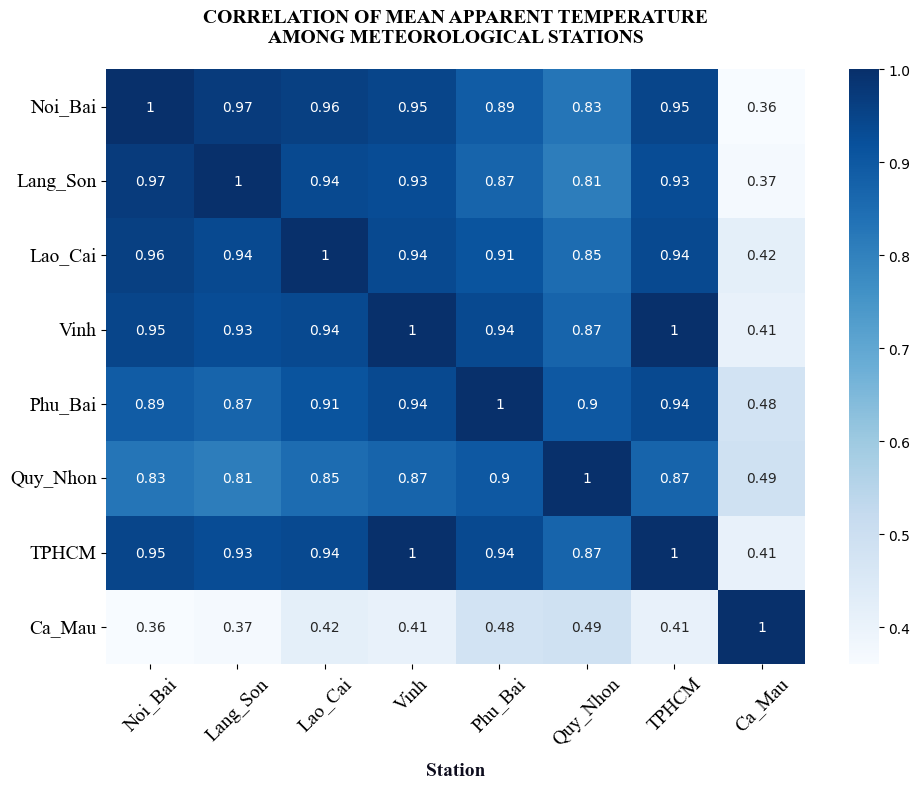

In [20]:
def plot_corr(station_df, feature, feature_name):
    plt.figure(figsize=(10, 8))

    corr_feature = get_corr(station_df, feature)
    sns.heatmap(data=corr_feature, annot=True, cmap='Blues')

    plt.xticks(fontfamily='Times New Roman', fontsize=14, rotation=45)
    plt.yticks(fontfamily='Times New Roman', fontsize=14, rotation=0)

    plt.title(f'CORRELATION OF {feature_name[feature].upper()}\nAMONG METEOROLOGICAL STATIONS',
              fontfamily='Times New Roman', fontsize=14, pad=20, fontweight='bold')
    plt.xlabel('Station', fontfamily='Times New Roman', color='#0d0c1d', fontsize=14, fontweight='bold',
               labelpad=10)

    plt.tight_layout()
    plt.show()

plot_corr(station_dfs, 'AT mean', feature_name)

{'Noi_Bai': np.float64(21.924588165827736), 'Lang_Son': np.float64(19.358219233735568), 'Lao_Cai': np.float64(21.64140425627149), 'Vinh': np.float64(22.327050352650623), 'Phu_Bai': np.float64(23.13055163947989), 'Quy_Nhon': np.float64(24.917973207651567), 'TPHCM': np.float64(22.327050352650623), 'Ca_Mau': np.float64(25.28298714940737)}


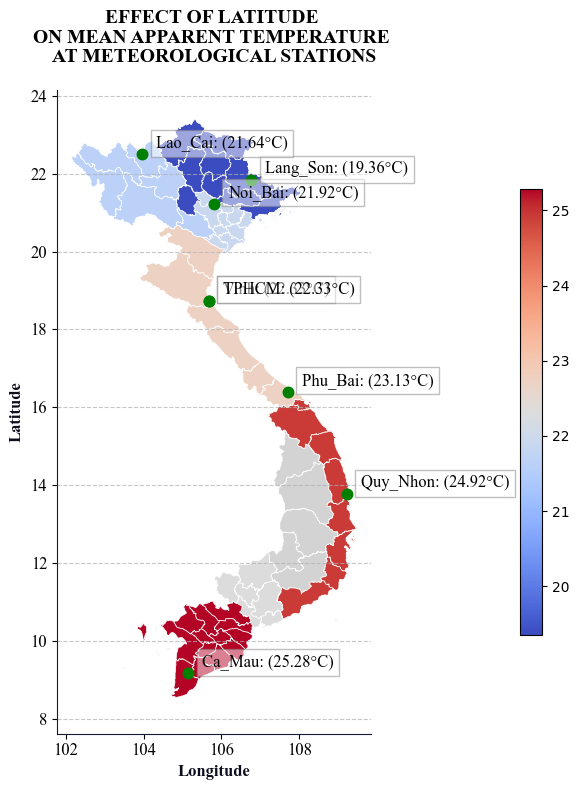

In [21]:
def plot_latitude_effect(station_df, station_info, station_name, region_dict, feature, feature_name):
    # Load Vietnam shapefile
    vietnam = gpd.read_file('./gadm41_VNM_shp', layer='gadm41_VNM_1')
    mean_feature_dict = get_mean(station_df, feature)
    stations = pd.DataFrame({
        'name': station_name,
        'lat': [station_info[name][0] for name in station_name],
        'lon': [station_info[name][1] for name in station_name],
        'region': ['Đồng bằng sông Hồng', 'Đông Bắc', 'Tây Bắc', 'Bắc Trung Bộ', 'Bắc Trung Bộ',
                   'Duyên hải Nam Trung Bộ', 'Đông Nam Bộ', 'Đồng bằng sông Cửu Long'],
        'feature_values': [mean_feature_dict[name] for name in station_name]
    })
    stations_gdf = gpd.GeoDataFrame(
        stations,
        geometry=gpd.points_from_xy(stations.lon, stations.lat),
        crs="EPSG:4326"
    )

    vietnam['region'] = vietnam['NAME_1'].map(region_dict)

    region_mean_values = {}
    for region in stations['region'].unique():
        region_stations = stations[stations['region'] == region]
        if not region_stations.empty:
            region_mean_values[region] = region_stations['feature_values'].mean()

    # Thêm giá trị trung bình vào GeoDataFrame của Vietnam
    vietnam['mean_feature'] = vietnam['region'].map(region_mean_values)

    # Tạo figure
    fig, ax = plt.subplots(figsize=(8, 8))

    vietnam.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.5)

    # Vẽ bản đồ với màu dựa trên giá trị trung bình của từng vùng
    if feature == 'RH':
        color_vietnam_plot = 'Reds'
    else:
        color_vietnam_plot = 'coolwarm'
    vietnam.plot(column='mean_feature',
                 ax=ax,
                 cmap=color_vietnam_plot,
                 edgecolor='white',
                 linewidth=0.5,
                 legend=True,
                 legend_kwds={
                              'orientation': 'vertical',  # Đổi sang định hướng dọc
                              'shrink': 0.8,  # Điều chỉnh kích thước
                              'pad': 0.2,  # Khoảng cách từ biểu đồ
                              'fraction': 0.03,  # Chiều rộng của colorbar
                              'aspect': 20,  # Tỉ lệ chiều cao/chiều rộng
                              })

    label_offsets = {
        'Lào Cai': (-60, 10),  # Di chuyển sang trái và lên trên
        'Lạng Sơn': (10, 15),  # Di chuyển sang phải và lên trên
        'Nội Bài': (30, -30)  # Di chuyển sang phải và xuống dưới
    }
    unit = {
        'TMP_2': '°C',
        'DEW_2': '°C',
        'RH': '%',
        'AT mean': '°C',
        'AT max': '°C'
    }
    # Thêm tên các trạm
    for idx, row in stations_gdf.iterrows():
        station_name = row['name']
        offset = label_offsets.get(station_name, (10, 5))
        if row['name'] == 'Quy Nhơn':
            plt.annotate(f"{row['name']}\n({row['feature_values']:.2f}{unit[feature]})",
                         (row['lon'], row['lat']),
                         xytext=offset,
                         textcoords='offset points',
                         fontsize=12,
                         fontfamily='Times New Roman',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        else:
            plt.annotate(f"{row['name']}: ({row['feature_values']:.2f}{unit[feature]})",
                         (row['lon'], row['lat']),
                         xytext=offset,
                         textcoords='offset points',
                         fontsize=12,
                         fontfamily='Times New Roman',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

    scatter = ax.scatter(stations_gdf.lon, stations_gdf.lat,
                         c='green',
                         s=50,
                         marker='o',
                         edgecolor='green',
                         linewidth=1.5)

    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.gca().spines[['left', 'bottom']].set_color('#161b33')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontfamily='Times New Roman', fontsize=12)
    plt.yticks(fontfamily='Times New Roman', fontsize=12)
    plt.title(f"EFFECT OF LATITUDE \nON {feature_name[feature].upper()} \nAT METEOROLOGICAL STATIONS",
          fontfamily='Times New Roman', fontsize=14, pad=20, fontweight='bold')

    plt.xlabel('Longitude', fontfamily='Times New Roman', color='#0d0c1d', fontsize=12, fontweight='bold')
    plt.ylabel('Latitude', fontfamily='Times New Roman', color='#0d0c1d', fontsize=12, fontweight='bold')

    ax.set_aspect('equal')
    plt.subplots_adjust(left=0.038, bottom=0.062, right=0.824, top=0.895, wspace=0.2, hspace=0.2)
    plt.tight_layout()
    plt.show()


station_order = ['Noi_Bai', 
                 'Lang_Son', 
                 'Lao_Cai', 
                 'Vinh', 
                 'Phu_Bai', 
                 'Quy_Nhon', 
                 'TPHCM', 
                 'Ca_Mau']
station_info = get_station_info(station_dfs)
plot_latitude_effect(station_dfs, station_info, station_order, region_dict, 'AT mean', feature_name)

### Analyzing the temporal trend of apparent temperature at meteorological stations
Two main aspects are analyzed in this section:
1. **Analysis of annual trends in the selected features**
   * Analysis of annual apparent temperature trends: function plot_annual_AT_trend
   * Analysis of annual air temperature, dew point, relative humidity trends: plot_annual_TMP_DEW_RH_trend
   
2. **Analysis of monthly trends in the selected features**
    * Analysis of monthly apparent temperature trends: function plot_monthly_AT_trend
    * nalysis of monthly air temperature, dew point, relative humidity trends: function plot_monthly_TMP_DEW_RH_trend
   

In [22]:
def compute_annual_mean(df, feature, unit):
    return df.groupby(unit)[feature].mean()

In [23]:
def plot_trend_line(years, values, color, label=None, linewidth=2.5):
    z = np.polyfit(years, values, 1)
    p = np.poly1d(z)
    plt.plot(years, p(years), linestyle='-', color=color, linewidth=linewidth, label=label)
    return z

def plot_mean_line(value, label=None, color='#cccccc'):
    plt.axhline(y=value, color=color, linestyle='--', linewidth=1.5, label=label)

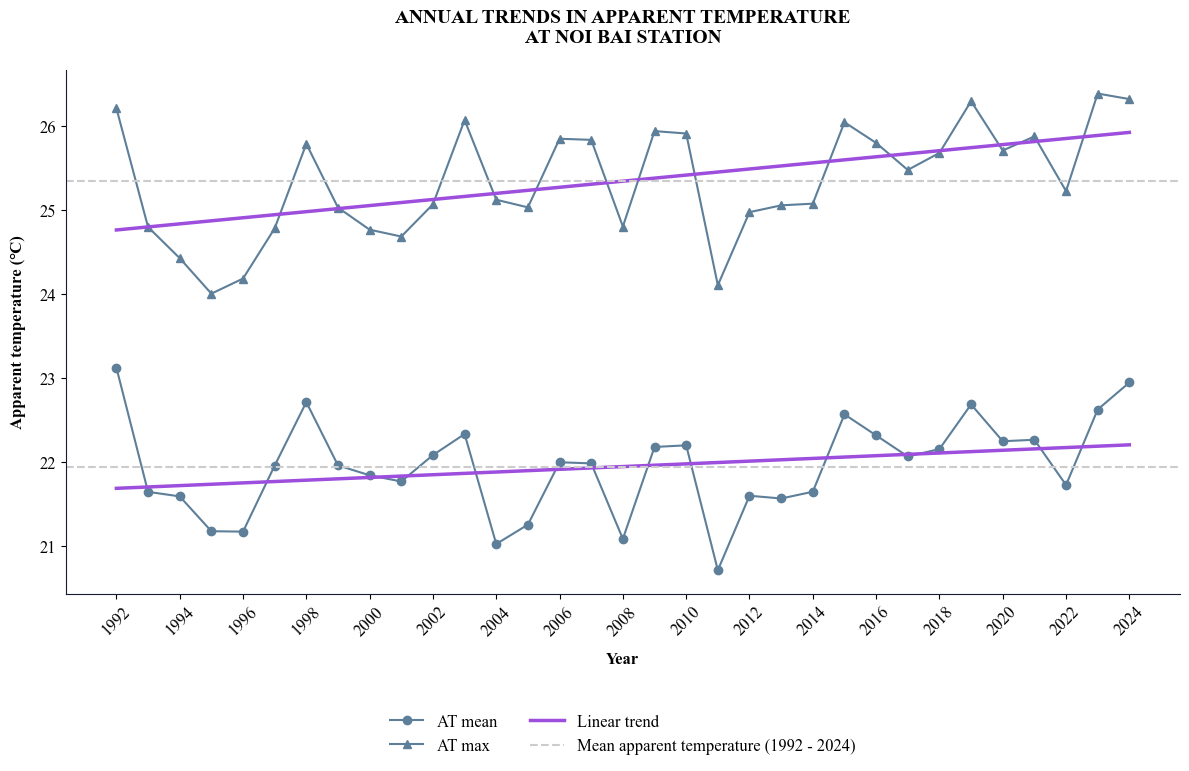

In [24]:
def plot_annual_AT_trend(df, station_name):
    mean_at = compute_annual_mean(df, 'AT mean', 'YEAR')
    mean_at_max = compute_annual_mean(df, 'AT max', 'YEAR')

    plt.figure(figsize=(12, 8))
    
    years = np.arange(1992, 2025)
    xtick_labels = list(range(1992, 2025, 2))
    if 2024 not in xtick_labels:
        xtick_labels.append(2024)

    plt.plot(years, mean_at, marker='o', color='#5D7F99', label='AT mean')
    plt.plot(years, mean_at_max, marker='^', color='#5D7F99', label='AT max')

    z = plot_trend_line(years, mean_at, color='#9d4edd', label="Linear trend")
    plot_trend_line(years, mean_at_max, color='#9d4edd')

    plot_mean_line(np.mean(mean_at), 'Mean apparent temperature (1992 - 2024)')
    plot_mean_line(np.mean(mean_at_max))

    plt.xticks(ticks=xtick_labels, rotation=45, fontfamily='Times New Roman', fontsize=12)
    plt.yticks(fontfamily='Times New Roman', fontsize=12)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.gca().spines[['bottom', 'left']].set_color('#161b33')

    plt.xlabel("Year", fontfamily='Times New Roman', fontsize=12, fontweight='bold', labelpad=10)
    plt.ylabel("Apparent temperature (℃)", fontfamily='Times New Roman', fontsize=12, fontweight='bold', labelpad=10)
    plt.title(f"ANNUAL TRENDS IN APPARENT TEMPERATURE\nAT {station_name.upper()} STATION",
              fontfamily='Times New Roman', fontsize=14, fontweight='bold', pad=20)

    font_prop = FontProperties(family='Times New Roman', size=12)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
               ncol=2, prop=font_prop, frameon=False)
    
    plt.tight_layout()
    plt.show()

plot_annual_AT_trend(df_NoiBai, 'Noi Bai')

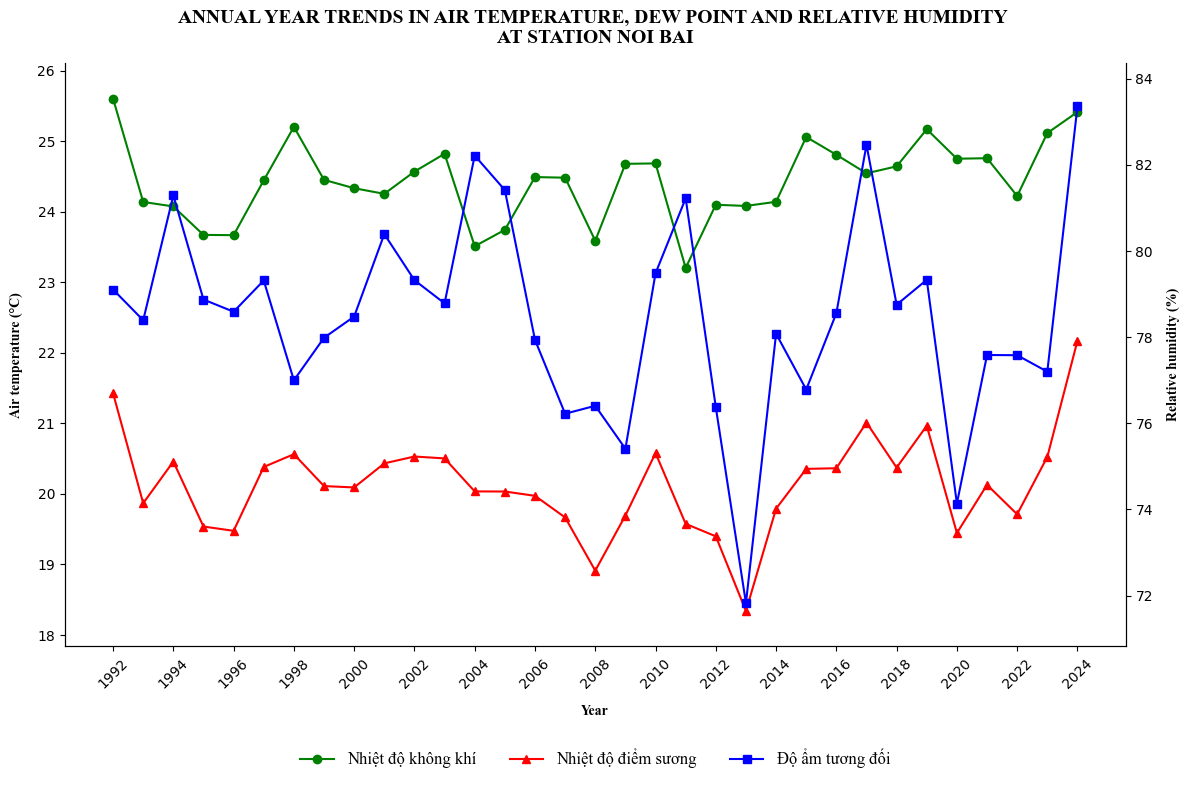

In [25]:
def plot_annual_TMP_DEW_RH_trend(df, station_name):
    mean_tmp = compute_annual_mean(df, 'TMP_2', 'YEAR')
    mean_dew = compute_annual_mean(df, 'DEW_2', 'YEAR')
    mean_rh = compute_annual_mean(df, 'RH', 'YEAR')
    temp_min = min(mean_tmp.min(), mean_dew.min()) - 0.5
    temp_max = max(mean_tmp.max(), mean_dew.max()) + 0.5
    rh_min = mean_rh.min() - 1
    rh_max = mean_rh.max() + 1
    
    years = np.arange(1992, 2025)
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.spines['top'].set_visible(False)
    ax1.set_xlabel('Year', fontfamily='Times New Roman', fontweight='bold', labelpad=10)
    ax1.set_ylabel('Air temperature (°C)', color='black', fontfamily='Times New Roman', fontweight='bold', labelpad=10)
    line1, = ax1.plot(years, mean_tmp, 'o-', color='green', linewidth=1.5, markersize=6,
                      label='Air temperature (°C)')
    line2, = ax1.plot(years, mean_dew, '^-', color='red', linewidth=1.5, markersize=6,
                      label='Dew point (°C)')

    ax1.set_ylim(temp_min, temp_max)
    ax2 = ax1.twinx()
    ax2.spines['top'].set_visible(False)
    ax2.set_ylabel('Relative humidity (%)', color='black', fontfamily='Times New Roman', fontweight='bold', labelpad=10)
    line3, = ax2.plot(years, mean_rh, 's-', color='blue', linewidth=1.5, markersize=6,
                      label='Relative humidity(%)')
    ax2.set_ylim(rh_min, rh_max)

    plt.title(
        f'ANNUAL YEAR TRENDS IN AIR TEMPERATURE, DEW POINT AND RELATIVE HUMIDITY \nAT STATION {station_name.upper()}',
        fontweight='bold', fontsize=14, fontfamily='Times New Roman', pad=15)

    lines = [line1, line2, line3]
    labels = ['Nhiệt độ không khí', 'Nhiệt độ điểm sương', 'Độ ẩm tương đối']
    font_prop = {'family': 'Times New Roman', 'size': 12}
    legend = plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
                        ncol=3, prop=font_prop, frameon=False)

    ax1.set_xticks(np.arange(1992, 2025, 2))
    ax1.tick_params(axis='x', labelrotation=45)
    
    plt.tight_layout()
    plt.show()

plot_annual_TMP_DEW_RH_trend(df_NoiBai, 'Noi Bai')

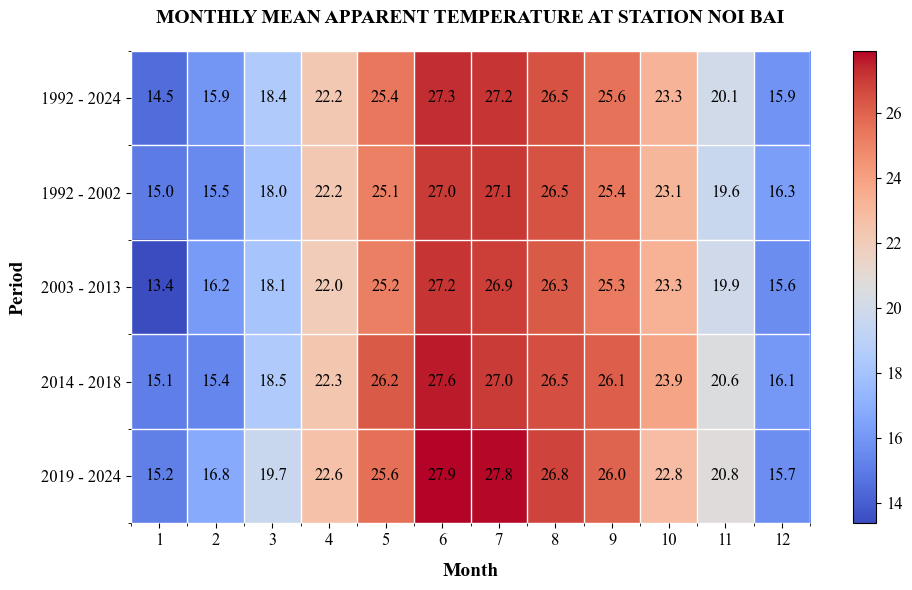

In [26]:
def plot_monthly_AT_trend(df, station_name, feature):
    df = df.copy()
    conditions = [
        (df['YEAR'] >= 1992) & (df['YEAR'] <= 2002),
        (df['YEAR'] >= 2003) & (df['YEAR'] <= 2013),
        (df['YEAR'] >= 2014) & (df['YEAR'] <= 2018),
        (df['YEAR'] >= 2019) & (df['YEAR'] <= 2024),
    ]
    choices = ['1992 - 2002', '2003 - 2013', '2014 - 2018', '2019 - 2024']
    df['period'] = np.select(conditions, choices, default='Other')

    mean_at = compute_annual_mean(df, feature, ['period', 'MONTH']).unstack('MONTH')
    total_df = df[(df['YEAR'] >= 1992) & (df['YEAR'] <= 2024)]
    mean_total = compute_annual_mean(total_df, feature, 'MONTH')
    mean_at.loc['1992 - 2024'] = mean_total
    choices.append('1992 - 2024')
    mean_at = mean_at.reindex(choices)
    choices = ['1992 - 2024'] + choices[:-1]
    mean_at = mean_at.reindex(choices)
    mean_at_values = mean_at.values

    plt.figure(figsize=(10, 6), dpi=100)
    ax = plt.gca()
    im = ax.imshow(mean_at_values, cmap='coolwarm', aspect='auto')
    ax.set_xticks(np.arange(mean_at_values.shape[1] + 0.5) - .5, minor=True)
    ax.set_yticks(np.arange(mean_at_values.shape[0] + 0.5) - .5, minor=True)
    ax.grid(which="minor", color="white", linestyle='-', linewidth=1)
    ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

    cbar = plt.colorbar(im)
    for l in cbar.ax.yaxis.get_ticklabels():
        l.set_family("Times New Roman")
        l.set_size(12)

    # Thêm annotations
    for i in range(len(choices)):
        for j in range(12):
            text = ax.text(j, i, f'{mean_at_values[i, j]:.1f}',
                           ha="center", va="center", fontsize=12, fontfamily='Times New Roman',
                           color="black")

    ax.set_yticks(np.arange(len(choices)))
    ax.set_yticklabels(choices, fontsize=12, fontfamily='Times New Roman')

    x_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels, fontsize=12, fontfamily='Times New Roman')
    ax.set_xlabel('Month', fontsize=14, fontfamily='Times New Roman', fontweight='bold', labelpad=10)
    ax.set_ylabel('Period', fontsize=14, fontfamily='Times New Roman', fontweight='bold', labelpad=10)

    if feature == 'AT mean':
        ax.set_title(f'MONTHLY MEAN APPARENT TEMPERATURE AT STATION {station_name.upper()}', fontsize=14, pad=20, fontfamily='Times New Roman',
                     fontweight='bold')
    else:
        ax.set_title(f'MONTHLY EXTREME APPARENT TEMPERATURE AT STATION {station_name.upper()}', fontsize=14, pad=20, fontfamily='Times New Roman',
                     fontweight='bold')

    plt.tight_layout()
    plt.show()

plot_monthly_AT_trend(df_NoiBai, 'Noi Bai','AT mean')

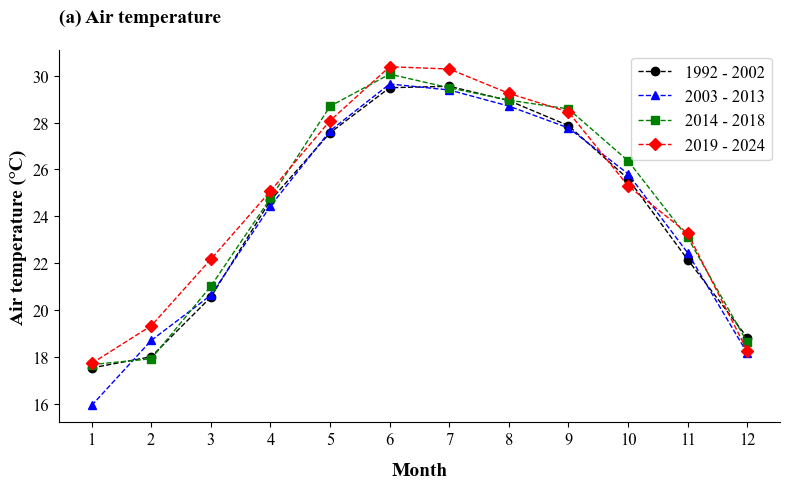

In [27]:
def plot_monthly_TMP_DEW_RH_trend(df, station_name, feature):
    df = df.copy()
    conditions = [
        (df['YEAR'] >= 1992) & (df['YEAR'] <= 2002),
        (df['YEAR'] >= 2003) & (df['YEAR'] <= 2013),
        (df['YEAR'] >= 2014) & (df['YEAR'] <= 2018),
        (df['YEAR'] >= 2019) & (df['YEAR'] <= 2024),
    ]
    choices = ['1992 - 2002', '2003 - 2013', '2014 - 2018', '2019 - 2024']
    df['period'] = np.select(conditions, choices, default='Other')
    mean_at = compute_annual_mean(df, feature, ['period', 'MONTH']).unstack('MONTH')
    mean_at = mean_at.reindex(choices)
    pd.set_option('display.max_columns', None)
    plt.figure(figsize=(8, 5), dpi=100)
    colors = ['black', 'blue', 'green', 'red']
    markers = ['o', '^', 's', 'D']

    for i, period in enumerate(choices):
        plt.plot(range(1, 13), mean_at.loc[period], marker=markers[i], linewidth=1,
                 label=period, color=colors[i], linestyle='--')
    plt.yticks(fontsize=12, fontfamily='Times New Roman')
    plt.xticks(range(1, 13), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
               fontfamily='Times New Roman', fontsize=12)
    plt.xlabel('Month', fontsize=14, fontweight='bold', labelpad=10, fontfamily='Times New Roman')

    if feature == 'TMP_2':
        plt.ylabel('Air temperature (°C)', fontsize=14, fontfamily='Times New Roman', fontweight='bold')
        plt.title(f'(a) Air temperature', fontsize=14, pad=20, fontweight='bold', fontfamily='Times New Roman',
                  loc='left')
    elif feature == 'DEW_2':
        plt.ylabel('Dew point (°C)', fontsize=14, fontfamily='Times New Roman', fontweight='bold')
        plt.title(f'(b) Dew point', fontsize=14, pad=20, fontweight='bold', fontfamily='Times New Roman',
                  loc='left')
    elif feature == 'RH':
        plt.ylabel('Relative humidity (%)', fontsize=14, fontfamily='Times New Roman', fontweight='bold')
        plt.title(f'(c) Relative humidity', fontsize=14, pad=20, fontweight='bold', fontfamily='Times New Roman',
                  loc='left')

    plt.gca().spines[['top', 'right']].set_visible(False)
    font_properties = {'family': 'Times New Roman', 'size': 12}
    plt.legend(loc='best', prop=font_properties)

    plt.tight_layout()
    plt.show()

plot_monthly_TMP_DEW_RH_trend(df_NoiBai, 'Noi Bai', 'TMP_2')